<a href="https://colab.research.google.com/github/B-hub-hue/Python.exam_polymer/blob/main/Python_exam_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

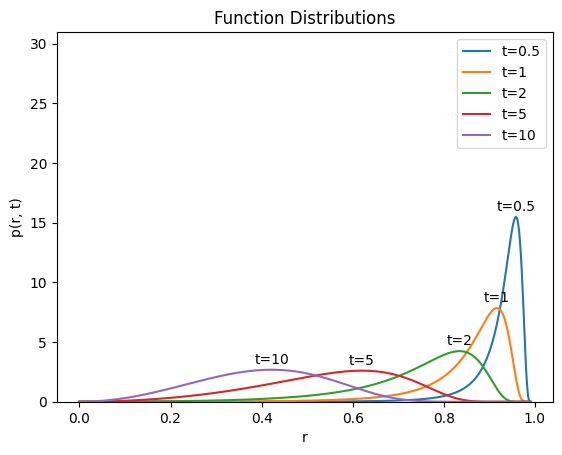

In [ ]:
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
def P(r= np.array([0.0, 0.2, 0.4, 0.6, 0.8, 0.99]), t=(0.5, 1, 2, 5, 10)):
# np.random.randint(0.1, 10, size=10)
  t = np.array(t)
  result=[]

  for time_val in t:
   a = 0.75*time_val
   C = 1/((np.pi**3/2)*(np.exp(-a))*(a**(-3/2))*((1+3*a**-1)+((15/4)*(a**-2))))
   prob = 4*C*np.pi*(r**2/(1-r**2)**(9/2))*np.exp((-3*time_val/4)*(1/(1-r**2)))
   result.append(prob)
   prob /= np.trapz(prob, r)  # Normalize using trapezoidal integration


  return np.array(result)

r= np.linspace(0, 0.99, 1000)#np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
t_values = (0.5, 1, 2, 5, 10)
result = P(r, t_values)

for i in range(result.shape[0]):
    plt.plot(r, result[i])
    # Annotate t value above each curve at the peak
    peak_x = r[np.argmax(result[i])]  # Find the x position of the peak
    peak_y = np.max(result[i])        # Find the y position of the peak
    plt.text(peak_x, peak_y + 0.5, f't={t_values[i]}', ha='center', fontsize=10)


#plt.plot(result)
plt.ylim(0, 2 *np.max(result))
plt.xlabel('r')
plt.ylabel('p(r, t)')
plt.title('Function Distributions')
plt.legend(['t=0.5', 't=1', 't=2', 't=5', 't=10'])
plt.show()

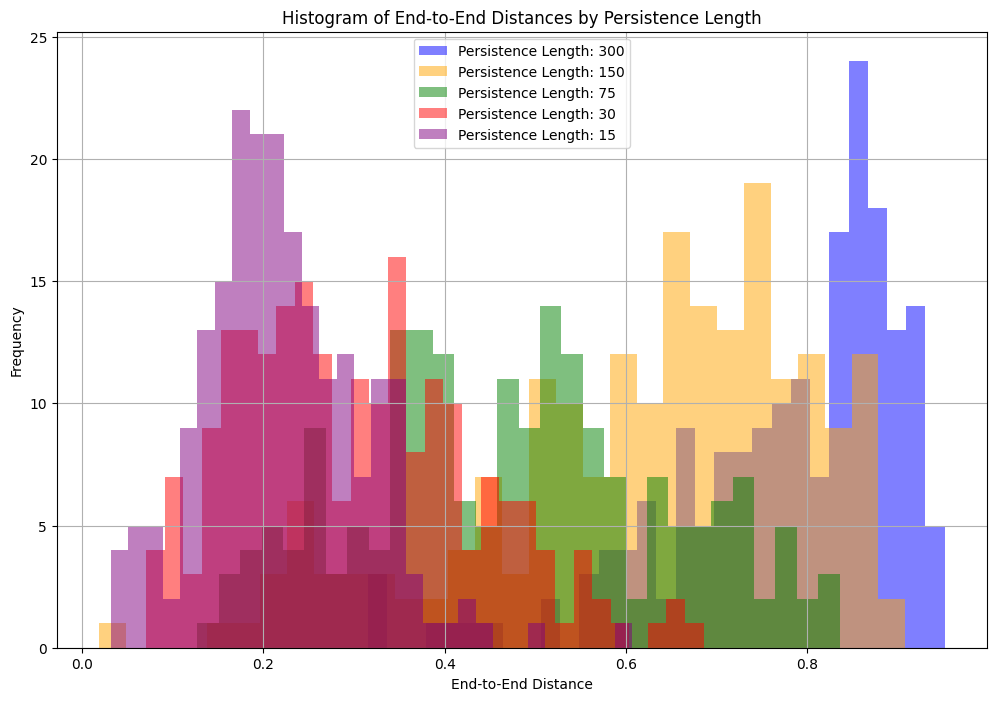

0.46236438329888163


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

delta_theta = 0.102

def custom_gaussian_theta(delta_theta):
    #"""Sample from the custom Gaussian distribution for theta."""
    return np.random.normal(0, delta_theta)

def rodrigues_rotation(v, k, theta, phi):
    k = k / np.linalg.norm(k)  # Ensure k is a unit vector
    c_theta = np.cos(theta)
    s_theta = np.sin(theta)
    return (v * c_theta +
            np.cross(k, v) * s_theta +
            k * np.dot(k, v) * (1 - c_theta))

def end_to_end_distance(positions):
    return np.linalg.norm(positions[-1] - positions[0])

# Parameters
num_segments = 1000
num_trials = 1000  # Number of trials to gather distances

persistence_lengths = np.array([300, 150, 75, 30, 15])  # Array of persistence lengths

# Store distances for each persistence length
distances_dict = {length: [] for length in persistence_lengths}

for _ in range(num_trials):
    vectors = [np.array([1, 0, 0])]  # Starting vector
    persistence_length = np.random.choice(persistence_lengths)  # Randomly select a persistence length
    for _ in range(1, num_segments):
        # Sample theta based on the selected persistence length
        theta = custom_gaussian_theta(1 / np.sqrt(persistence_length))  # Scale by persistence length
        axis_of_rotation = np.cross(np.random.random(size=3), vectors[-1])
        phi = np.random.uniform(0, 2 * np.pi)  # Uniformly distributed phi
        new_vector = rodrigues_rotation(vectors[-1], axis_of_rotation, theta, phi)
        vectors.append(new_vector)

    # Convert list of vectors to numpy array
    vectors = np.array(vectors)

    # Calculate end-to-end distance and store it
    distance = end_to_end_distance(vectors.cumsum(axis=0))/1000  # cumulative sum = cumsum
    distances_dict[persistence_length].append(distance)

# Plotting the histogram of end-to-end distances for each persistence length
plt.figure(figsize=(12, 8))

#colors = plt.cm.viridis(np.linspace(0, 1, len(persistence_lengths)))  # Color map
colors = ['blue', 'orange','green', 'red', 'purple']
for i, persistence_length in enumerate(persistence_lengths):
    plt.hist(distances_dict[persistence_length], bins=30,
             alpha=0.5, color=colors[i], #edgecolor='black',
             label=f'Persistence Length: {persistence_length}')


plt.title('Histogram of End-to-End Distances by Persistence Length')
plt.xlabel('End-to-End Distance')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
print(distance)

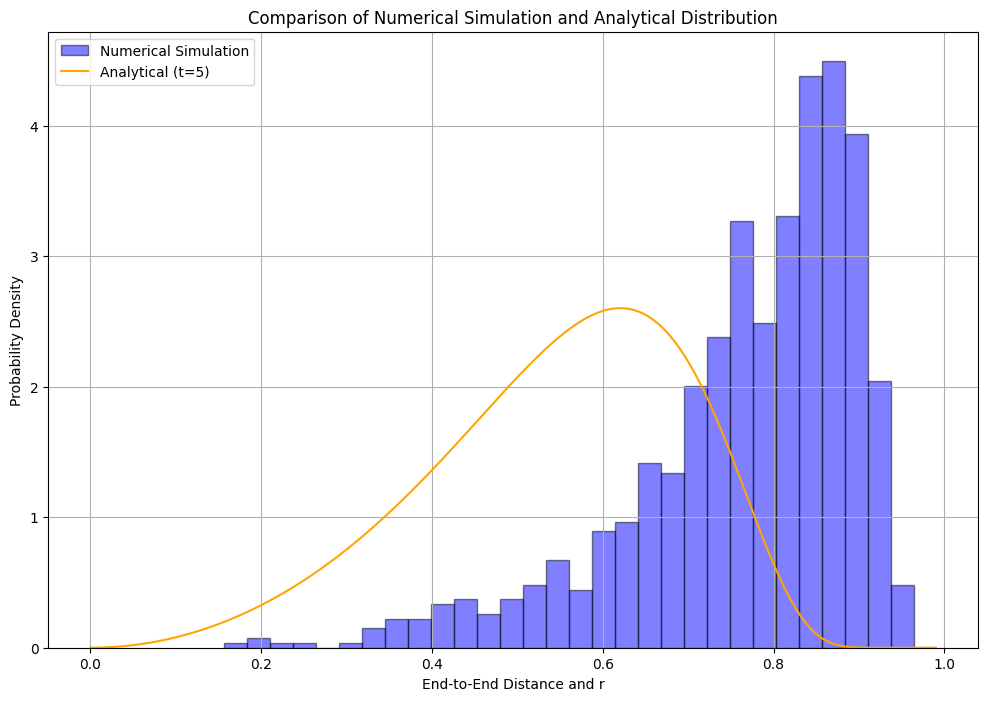

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def custom_gaussian_theta(delta_theta):
    #"""Sample from the custom Gaussian distribution for theta."""
    return np.random.normal(0, delta_theta)
#def p(theta):

      #return theta*np.exp(-theta**2/(2*delta_theta**2))

def rodrigues_rotation(v, k, theta, phi):
    k = k / np.linalg.norm(k)  # Ensure k is a unit vector
    c_theta = np.cos(theta)
    s_theta = np.sin(theta)
    return (v * c_theta +
            np.cross(k, v) * s_theta +
            k * np.dot(k, v) * (1 - c_theta))

def end_to_end_distance(positions):
    return np.linalg.norm(positions[-1] - positions[0])

# Parameters for Numerical Simulation
num_segments = 100 # Number of segments in the polymer chain
num_trials = 1000   # Number of trials to gather distances
persistence_length = 30  # Persistence length

# Store distances for the numerical simulation
distances = []

for _ in range(num_trials):
    # Starting vector (arbitrary direction)
    vectors = [np.array([1, 0, 0])]

    for _ in range(1, num_segments):
        # Sample theta (polar angle) from Gaussian distribution
        theta = custom_gaussian_theta(1 / np.sqrt(persistence_length))
        axis_of_rotation = np.cross(np.random.random(size=3), vectors[-1])

        # Sample phi (dihedral angle) uniformly between 0 and 2*pi
        phi = np.random.uniform(0, 2 * np.pi)
        # Rotate the previous vector by theta and phi
        new_vector = rodrigues_rotation(vectors[-1], axis_of_rotation, theta, phi)
        vectors.append(new_vector)

    # Convert list of vectors to numpy array
    vectors = np.array(vectors)

    # Calculate the end-to-end distance for this trial
    distance = end_to_end_distance(vectors.cumsum(axis=0))/100
    distances.append(distance)

#....... Prepare data for Analytical Distribution .......
def P(r = np.linspace(0, 0.99, 1000), t = 5):
    """Analytical solution for the probability distribution of end-to-end distance for worm-like chains."""
    a = 0.75 * t
    C = 1 / ((np.pi**3 / 2) * (np.exp(-a)) * (a**(-3/2)) * ((1 + 3 * a**-1) + (15 / 4) * (a**-2)))
    prob = 4 * C * np.pi * (r**2 / (1 - r**2)**(9/2)) * np.exp((-3 * t / 4) * (1 / (1 - r**2)))
    prob /= np.trapz(prob, r)  # Normalize using trapezoidal integration
    return prob

# Range of r values for analytical function
r = np.linspace(0, 0.99, 1000)
t = 5
t_value = t  # Let's take t = 10 for the analytical distribution
analytical_result = P(r, t_value)

# Plotting both distributions
plt.figure(figsize=(12, 8))

# Plot numerical simulation results
plt.hist(distances, bins=30, density=True, alpha=0.5, color='blue', edgecolor='black', label='Numerical Simulation')

# Plot analytical result
plt.plot(r, analytical_result, color='orange', label=f'Analytical (t={t_value})')

plt.xlabel('End-to-End Distance and r')
plt.ylabel('Probability Density')
plt.title('Comparison of Numerical Simulation and Analytical Distribution')
plt.legend()
plt.grid(True)
plt.show()

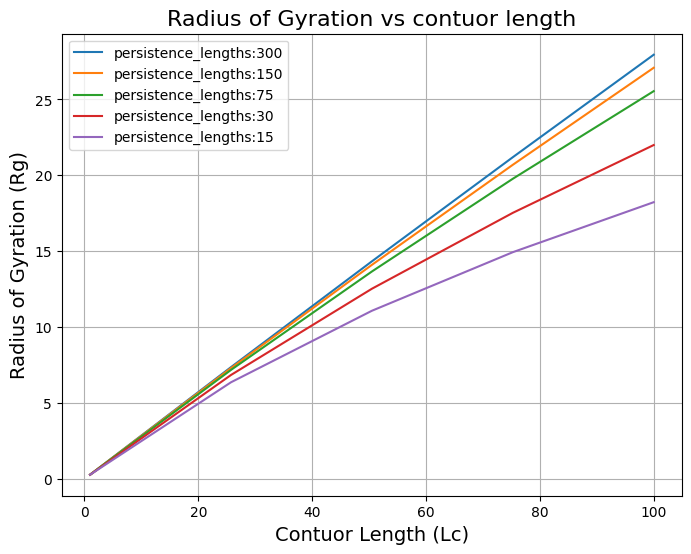

[0.2867654987890505, 6.373396199228566, 11.082927054289488, 14.939507572735586, 18.231508040127636]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#defing the parameters
N = 100 # Number of segments
L = 1
Lc = np.linspace(1, N, 5) # contour lengths

lp = [300, 150, 75, 30, 15] # persistence lengths

def radius_of_gyration(N, Lc, lp):
   B= lp/Lc

   return np.sqrt((Lc * lp/3)*(1-3*B*(1-2*B+2*(B**2)-2*(B**2)*np.exp(-1/B))))

# plotting the graph
plt.figure(figsize=(8, 6))

for lp in lp :
  Rg_values = [radius_of_gyration(N, Lc, lp) for Lc in Lc ]
  plt.plot(Lc, Rg_values, label=f'persistence_lengths:{lp}')

plt.xlabel('Contuor Length (Lc)', fontsize=14)
plt.ylabel('Radius of Gyration (Rg)', fontsize=14)
plt.title('Radius of Gyration vs contuor length', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
print(Rg_values)

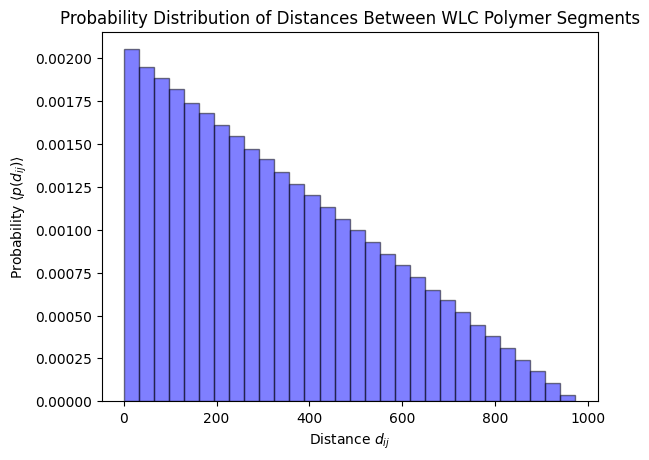

971.7206593131226


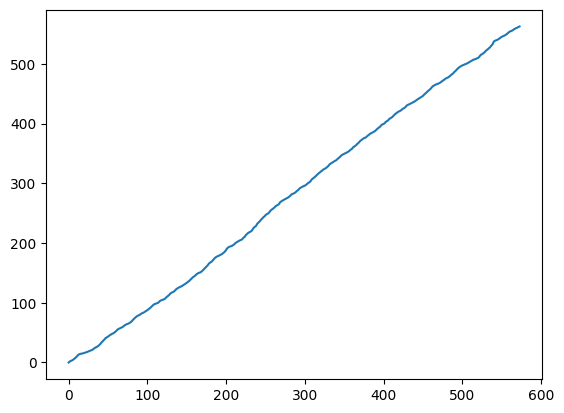

In [39]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
persistence_length = 10000
delta_theta = 0.102

def custom_gaussian_theta(delta_theta):
    return np.random.normal(0, delta_theta)

def rodrigues_rotation(v, k, theta, phi):
    k = k / np.linalg.norm(k)  # Ensure k is a unit vector
    c_theta = np.cos(theta)
    s_theta = np.sin(theta)
    return (v * c_theta +
            np.cross(k, v) * s_theta +
            k * np.dot(k, v) * (1 - c_theta))

def dij(positions, i, j):
    return np.linalg.norm(positions[i] - positions[j])

distances = []

for _ in range(1):
    # Starting vector (arbitrary direction)
    vectors = [np.array([0, 0, 1])]

    for _ in range(1, N):
        # Sample theta (polar angle) from Gaussian distribution
        #theta = custom_gaussian_theta(1 / np.sqrt(persistence_length))
        axis_of_rotation = np.cross(np.random.random(size=3), vectors[-1])

        # Sample phi (dihedral angle) uniformly between 0 and 2*pi
        phi = np.random.uniform(0, 2 * np.pi)
        # Rotate the previous vector by theta and phi
        new_vector = rodrigues_rotation(vectors[-1], axis_of_rotation, theta, phi)
        vectors.append(new_vector)

    # Convert list of vectors to numpy array
    vectors = np.array(vectors)
    # Calculate the cumulative sum once and store in positions
    positions = vectors.cumsum(axis=0)

    # Calculate the dij for this trial
    for i in range(0, N-1):
        for j in range(i + 1, N):
            distance = dij(positions, i, j)
            distances.append(distance)

plt.hist(distances, bins=30, density=True, alpha=0.5, color='blue', edgecolor='black', label='Numerical Simulation')

plt.xlabel('Distance $d_{ij}$')
plt.ylabel('Probability $\\langle p(d_{ij}) \\rangle$')
plt.title('Probability Distribution of Distances Between WLC Polymer Segments')

# Show plot
plt.show()
print(np.max(distances))
#plt.table(positions) #This line is causing an error.  Requires more information.
#plt.show()
plt.plot(positions[:,0],positions[:,1]) #Plotting the x and y coordinates
plt.show()


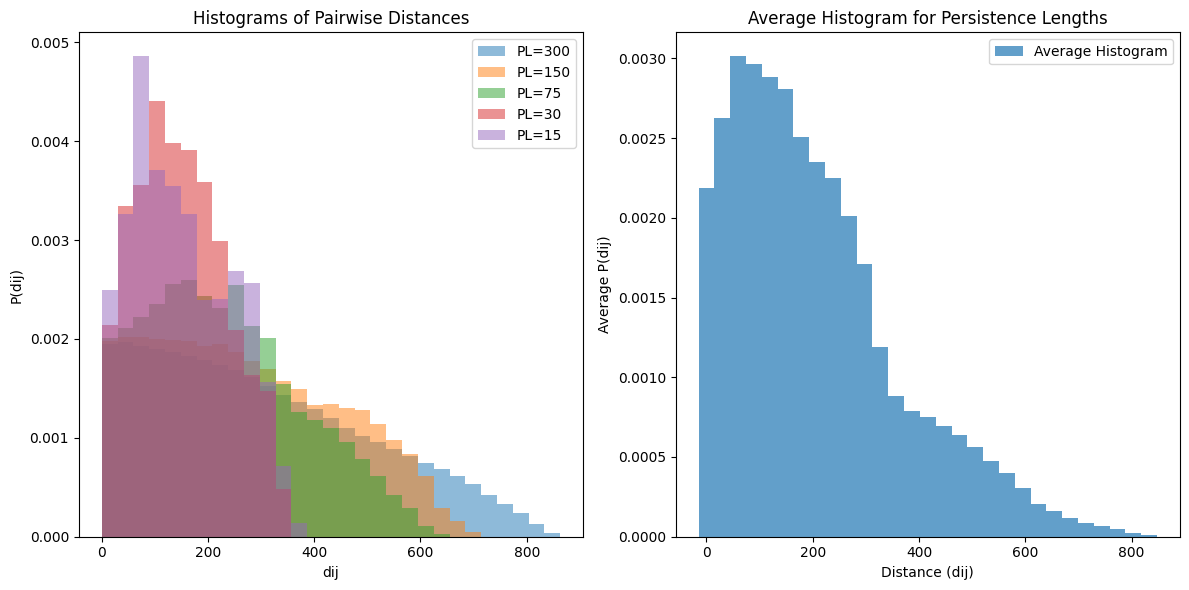

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define helper functions
delta_theta = 0.0102

def custom_gaussian_theta(delta_theta):
    """Sample from the custom Gaussian distribution for theta."""
    return np.random.normal(0, delta_theta)

def rodrigues_rotation(v, k, theta, phi):
    """Perform Rodrigues rotation."""
    k = k / np.linalg.norm(k)  # Ensure k is a unit vector
    c_theta = np.cos(theta)
    s_theta = np.sin(theta)
    return (v * c_theta +
            np.cross(k, v) * s_theta +
            k * np.dot(k, v) * (1 - c_theta))

def dij(positions, i, j):
    """Compute the distance between two points."""
    return np.linalg.norm(positions[i] - positions[j])

# Parameters
num_segments = 1000
num_trials = 1  # Number of trials to gather distances
persistence_lengths = [300, 150, 75, 30, 15]  # Array of persistence lengths

# Store distances for each persistence length
distances = {length: [] for length in persistence_lengths}

for _ in range(num_trials):
    for persistence_length in persistence_lengths:
        vectors = [np.array([0, 0, 1])]  # Starting vector
        for _ in range(1, num_segments):
            # Sample theta based on the selected persistence length
            theta = custom_gaussian_theta(1 / np.sqrt(persistence_length))  # Scale by persistence length
            phi = np.random.uniform(0, 2 * np.pi)  # Uniformly distributed phi
            axis_of_rotation = np.cross(np.random.random(size=3), vectors[-1])
            new_vector = rodrigues_rotation(vectors[-1], axis_of_rotation, theta, phi)
            vectors.append(new_vector)
        vectors = np.array(vectors)
        # Convert list of vectors to positions
        positions = np.cumsum(vectors, axis=0)

        # Calculate pairwise distances and store
        for i in range(len(positions) - 1):
            for j in range(i + 1, len(positions)):
                distances[persistence_length].append(dij(positions, i, j))

#..............................................................................#
# define a common set of bin edges for all histograms
common_bin_edges = np.linspace(0, max(max(distances[length])for length in persistence_lengths), 30)
# Plot histograms for each persistence length
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
all_histograms = []

for i, length in enumerate(persistence_lengths):
  hist_values, _ = np.histogram(distances[length], bins=common_bin_edges, density=True)
  ax1.hist(distances[length], bins=common_bin_edges, alpha=0.5, density=True, label=f'PL={length}')
  all_histograms.append(hist_values)

ax1.set_xlabel('dij')
ax1.set_ylabel('P(dij)')
ax1.legend()
ax1.set_title('Histograms of Pairwise Distances')

# Convert list of histograms to numpy array for averaging
all_histograms = np.array(all_histograms)

# Calculate the average histogram
average_hist = np.mean(all_histograms, axis=0)
# Normalize the average histogram to ensure the total area is 1
average_hist /= np.trapz(average_hist, common_bin_edges[:-1])

# Plot average histogram on the second subplot (ax2)
ax2.bar(common_bin_edges[:-1], average_hist, width=np.diff(common_bin_edges), alpha=0.7, label='Average Histogram')
ax2.set_xlabel('Distance (dij)')
ax2.set_ylabel('Average P(dij)')
ax2.set_title('Average Histogram for Persistence Lengths')
ax2.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


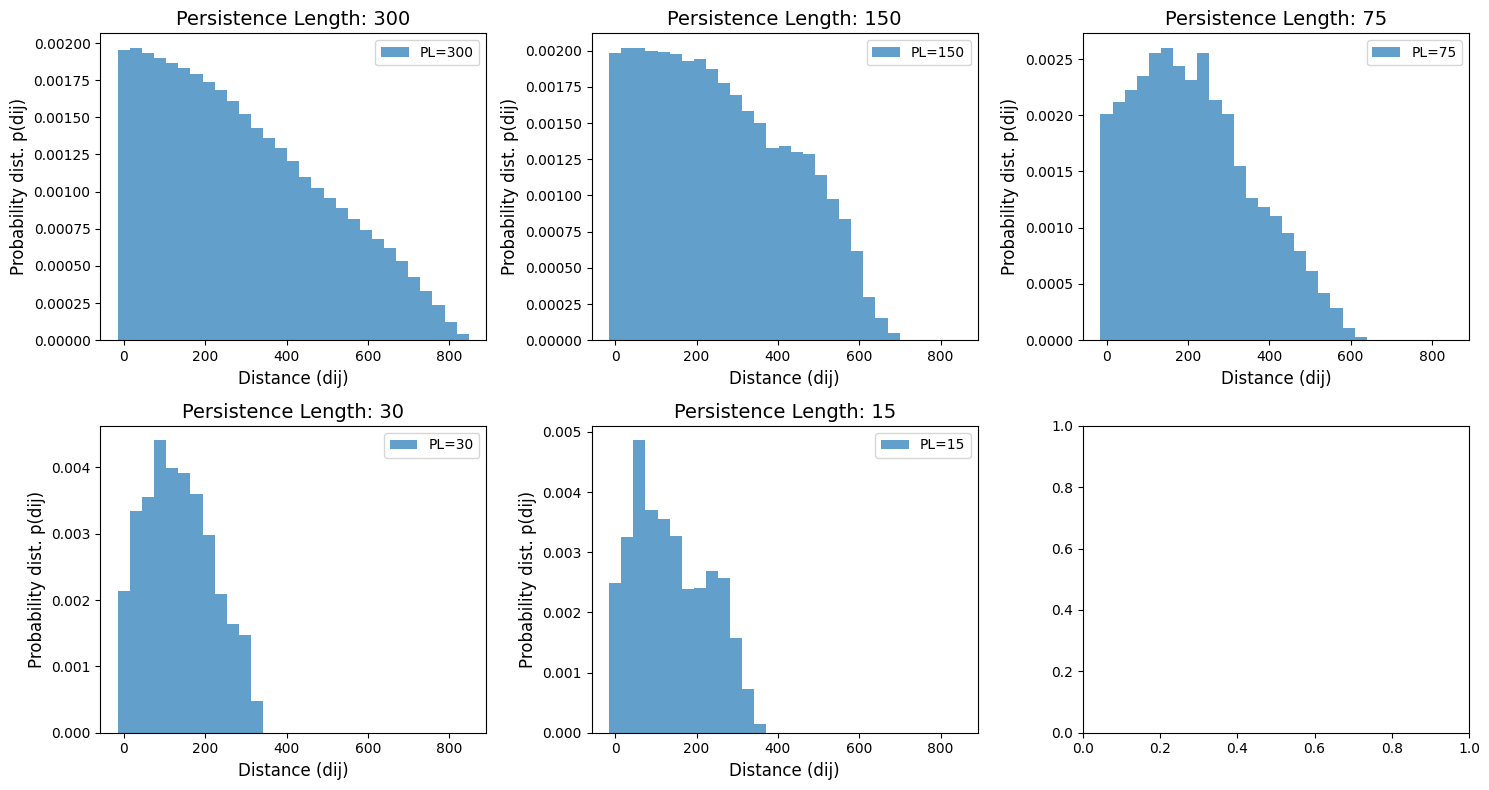

In [3]:
# Calculating the number of rows and columns for the grid
num_rows = 2  # Adjust as needed
num_cols = 3  # Adjust as needed

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through persistence lengths and plot in subplots
for i, length in enumerate(persistence_lengths):
    if i < len(axes):  # Make sure we don't exceed the number of subplots
        ax = axes[i]  # Get the current subplot
        # Calculate the histogram using common bin edges
        hist_values, _ = np.histogram(distances[length], bins=common_bin_edges, density=True)

        # Plot the histogram using common bin edges
        ax.bar(common_bin_edges[:-1], hist_values, width=np.diff(common_bin_edges), alpha=0.7, label=f'PL={length}')

        ax.set_title(f'Persistence Length: {length}', fontsize=14)
        ax.set_xlabel('Distance (dij)', fontsize=12)
        ax.set_ylabel('Probability dist. p(dij)', fontsize=12)
        ax.legend()
    else:
        break  # Stop if we have more persistence lengths than subplots

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

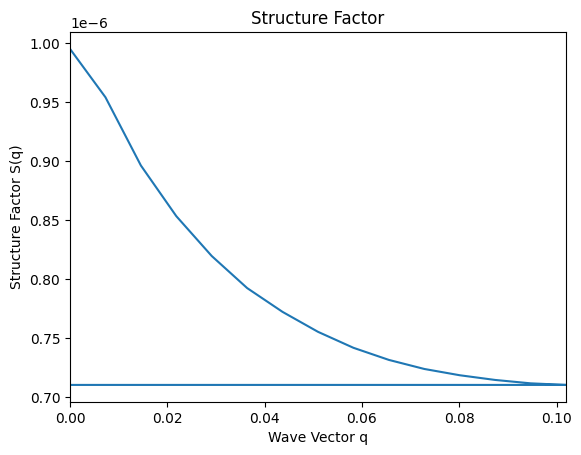

In [15]:
from scipy.fftpack import fft, fftfreq

r = 0.5 * (common_bin_edges[:-1] + common_bin_edges[1:])

g_r = average_hist/(4*np.pi*r**2)

#normalize the radial distrnution function g(r).
g_r /= np.trapz(g_r * 4 * np.pi * r**2, r)

# Subtract 1 to get (g(r) - 1)
#g_r_minus_1 = g_r

# Number density, assuming unit volume
#rho = sum(len(distances[length]) for length in persistence_lengths) / 1.0  # Replace 1.0 with the actual volume if different

# Compute the Fourier transform of g(r) - 1
S_q = fft(g_r)
q = fftfreq(len(r), (r[1] - r[0])) * 2 * np.pi

# Calculate the structure factor
S_q = S_q.real

# Plot the structure factor
plt.plot(q, S_q)
plt.xlim(0, max(q))
#plt.ylim(0, max(S_q))
plt.xlabel('Wave Vector q')
plt.ylabel('Structure Factor S(q)')
plt.title('Structure Factor')
plt.show()
